<a href="https://colab.research.google.com/github/chiyanglin-AStar/qiskit-community-tutorials/blob/master/Coding_With_Qiskit/ep3_Hello_World_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Coding with Qiskit Episode 3   
### this have been modified for qiskit 1.0 and run in colab

# Hello World!

In this episode of Coding with Qiskit, we built our first Hello World application.

The application first entangled two qubits which were initially in the state $\vert00\rangle$. Then, we noted the results by running the application on a simulator as well as real quantum hardware at IBM.

This Jupyter notebook shows the code that was used in the video, as well as updates in the latest version of Qiskit.

**Link to Episode 3:** https://www.youtube.com/watch?v=RrUTwq5jKM4

In [ ]:
from IPython.display import IFrame
IFrame(src="http://www.youtube.com/embed/RrUTwq5jKM4", width=1920/2, height=1080/2)

# Building the circuit

In [ ]:
!pip install qiskit
!pip install qiskit[visualization]

We begin by importing Qiskit.

In [ ]:
from qiskit import *

In the video, we initialized two qubits into a `QuantumRegister` and two classical bits into a `ClassicalRegister` by writing

In [ ]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

Then we built a `QuantumCircuit` composed of the two classical and quantum bits by saying

In [ ]:
circuit = QuantumCircuit(qr, cr)

The above three lines of code can be simplified into one line by writing

In [ ]:
circuit = QuantumCircuit(2,2)

where the first argument is the number of quantum bits, and the second argument is the number of classical bits. This is the recommended way of creating circuits.

Once you create your circuit, you can draw it at any point by writing

In [ ]:
circuit.draw()

q_0: 
     
q_1: 
     
c: 2/

For a plot based on `matplotlib`, use instead

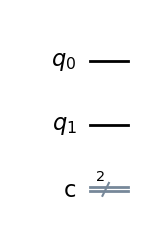

In [ ]:
%matplotlib inline
circuit.draw(output='mpl')

Note that you only need to run the `%matplotlib inline` command once in your notebook.

Next, let's add the gates.

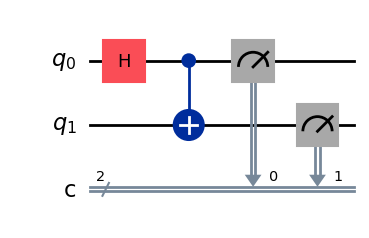

In [ ]:
# the quantum circuit has two qubits. they are indexed as qubits 0 and 1
circuit.h(0)
circuit.cx(0,1) # order is control, target
circuit.measure([0,1], [0,1]) # qubits [0,1] are measured and results are stored in classical bits [0,1] in order
circuit.draw(output='mpl')

# Running on a simulator

We begin by setting the simulator to `qasm_simulator` from the Aer element of Qiskit.

In [ ]:
#from qiskit.providers.basic_provider import BasicSimulator
#backend = BasicSimulator()

In [ ]:
#from qiskit import BasicAer
#simulator = get_backend("qasm_simulator")
#result = backend.run(qc).result()

In [ ]:
#simulator = Aer.get_backend('qasm_simulator')

Then, we execute the circuit on the simulator and store the results in a variable called `result`.

In [ ]:
#result = execute(circuit, backend=simulator).result()

ref from [Qasm simulator change : ](https://docs.quantum.ibm.com/api/qiskit/release-notes/1.0)

```
# Former path
from qiskit import BasicAer
backend = BasicAer.get_backend("qasm_simulator")
result = backend.run(qc).result()

# New path
from qiskit.providers.basic_provider import BasicProvider
backend = BasicProvider().get_backend("basic_simulator")
result = backend.run(qc).result()

# or, directly
from qiskit.providers.basic_provider import BasicSimulator
backend = BasicSimulator()
result = backend.run(qc).result()
```

At this point, we are ready to plot the results of the simulator execution. To do this, first import the visualization tools from Qiskit using

In [ ]:
# New path

from qiskit.providers.basic_provider import BasicSimulator
simulator = BasicSimulator()
result = simulator.run(circuit).result()

In [ ]:
from qiskit.visualization import plot_histogram

Then, we plot the results using

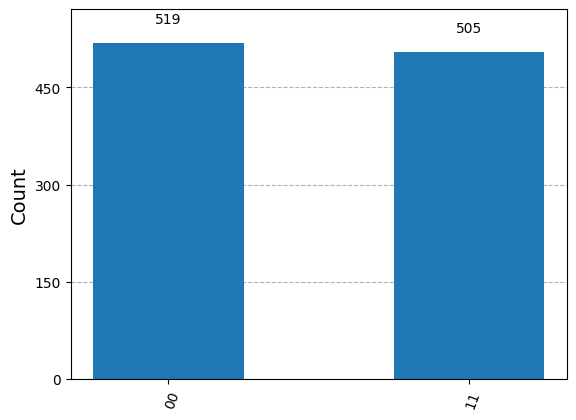

In [ ]:
plot_histogram(result.get_counts(circuit))

# Running on real quantum hardware
## This part need to reference [Migration_Guide_from_qiskit-ibmq-provider](https://github.com/Qiskit/qiskit-ibm-provider/blob/stable/0.6/docs/tutorials/Migration_Guide_from_qiskit-ibmq-provider.ipynb) for re-write

In order to run the circuit on real quantum hardware at IBM, we begin by loading our saved IBMQ account using

In [1]:
#I0BMQ.load_account()
#provider = IBMQ.get_provider(hub = 'ibm-q')

Then, we choose the backend that we want to use in our run. In the video, we used

In [ ]:
#qcomp = provider.get_backend('ibmq_16_melbourne')

Generally, if you have no preference on which backend you'd like to use, you can just ask for the least busy backend by using

In [ ]:
#num_qubits = 2

#from qiskit.providers.ibmq import least_busy
#possible_devices = provider.backends(filters=lambda x:
#                                    x.configuration().n_qubits >= num_qubits
#                                       and
#                                     x.configuration().simulator == False)
#qcomp = least_busy(possible_devices)
#print(qcomp)

Once the backend is selected, we are ready to run the circuit just as before using the `execute` function. Before doing so, a useful feature is to run the job watcher that is available in the latest version of Qiskit using

In [ ]:
#import qiskit.tools.jupyter
#%qiskit_job_watcher

In [ ]:
#job = execute(circuit, backend=qcomp)

You can also monitor the job progress inline using the job monitor:

In [ ]:
#from qiskit.tools.monitor import job_monitor
#job_monitor(job)

Once the job runs sucessfully, we can visualize the results using `plot_histogram` as before using

In [ ]:
#result = job.result()
#plot_histogram(result.get_counts(circuit))

You can close the job watcher window by using

In [ ]:
%qiskit_disable_job_watcher

UsageError: Line magic function `%qiskit_disable_job_watcher` not found.


# References

For detailed information about Qiskit, check out the tutorials in the Github repository:

https://github.com/Qiskit/qiskit-iqx-tutorials

# Version

It's good to note the Qiskit version that was used in your work. One way to do this is print the version at the bottom of the Jupyter notebook using

In [ ]:
#qiskit.__qiskit_version__

NameError: name 'qiskit' is not defined

In [ ]:
#%qiskit_copyright